In [ ]:
# import needed libraries

import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn

In [ ]:
# load data set and remove 

data = pd.read_csv("hungarian_heart_diseases.csv")
data.dropna()

,age,sex,chest_pain,trestbps,fasting_blood_sugar,restecg,thalach,exercise_induce_angina,oldpeak,outcome
0,28,1,2,130,0,2,185,0,0.0,0
1,29,1,2,120,0,0,160,0,0.0,0
2,29,1,2,140,0,0,170,0,0.0,0
3,30,0,1,170,0,1,170,0,0.0,0
4,31,0,2,100,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
279,52,1,4,160,0,0,94,1,2.5,1
280,54,0,3,130,0,1,100,1,0.0,1
281,56,1,4,155,1,0,150,1,3.0,1
282,58,0,2,180,0,0,110,1,1.0,1


In [ ]:
# explorar dados, fazer uns graficos, ver valores duplicados e missing

In [ ]:
x = data.drop(columns=['outcome'])
y = data['outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state = 1)

In [44]:
model = DecisionTreeClassifier(random_state = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Predicted results: ', y_pred.tolist())

Predicted results:  [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [ ]:
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score)

Accuracy:  0.7719298245614035


In [ ]:
# optional
cross_val = cross_val_score(model, x, y, cv=10, scoring='accuracy')
cross_val_mean = cross_val.mean()
print("Cross validation accuracy score (mean): ", cross_val_mean)

Cross validation accuracy score (mean):  0.6763546798029557


In [47]:
min_samples_leaf_values = [1, 3, 5, 10, 25, 50, 100]
train_accuracies = []
test_accuracies = []

for leaf in min_samples_leaf_values:
    model = DecisionTreeClassifier(min_samples_leaf=leaf, random_state = 1)
    model.fit(x_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(x_train))
    test_acc = accuracy_score(y_test, model.predict(x_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

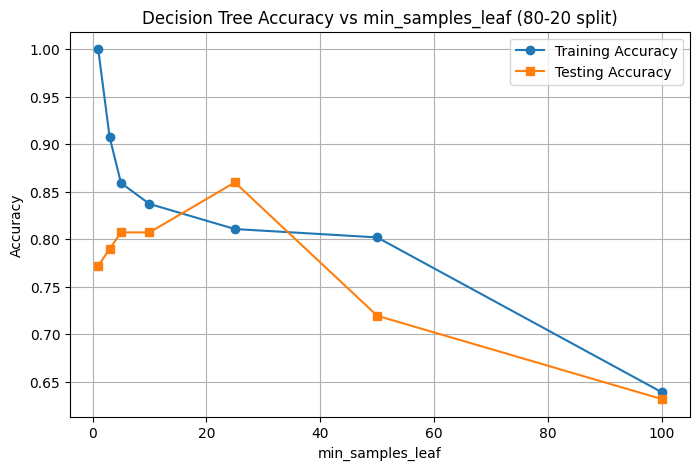

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(min_samples_leaf_values, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(min_samples_leaf_values, test_accuracies, marker='s', label="Testing Accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs min_samples_leaf (80-20 split)")
plt.legend()
plt.grid(True)
plt.show()

2.

# Analysis

Let's analyse the obtained graph:

### Min samples leaf [0, 5]:
    The graph shows very high training accuracy, and low testing accuracy. This indicates model overfitting, as the model is too adapted to training data. Therefore the generalization capacity is weak at this interval.

### Min samples leaf [5, 25]:
    In this section, as the tree becomes less complex, the training accuracy decreases and testing accuracy increases sightly. Moreover, the testing accuracy peaks at around leaf=25, where it surpasses training accuracy, indicating a strong bias–variance tradeoff: the model captures relevant data, while filtering out noise. This highlights that the generalization capacity of the model is best around this value.

### Min samples leaf [25, 100]:
    With high leaf values, both training and testing accuracies decrease greatly, which demonstrates an underfitting of the model, as well as a poor generalization capacity. This happens because, as the tree becomes less complex and the model becomes more constrained, underlying edge cases may not be accounted for.

A large gap between testing and training accuracies indicates overfitting (small leaf values), and a small gap indicates underfitting (greater leaf values). Both imply poor generalization for these leaf values.

# Conclusion

As discussed in the analysis, the decision tree does not generalize well in low leaf values (1-5) because it memorizes the training data and does not perform well for testing. The testing accuracy peaks at around leaf=25, which indicates a maximization of the generalization capacity. For greater leaf values, the model does not perform well and displays underfitting tendencies.

In conclusion, the 

3.